In [1]:
from qiskit import *
from qiskit.providers.ibmq import least_busy
from qiskit import Aer
from qiskit.compiler import assemble
from qiskit.visualization import plot_histogram
from qiskit.extensions import *

import numpy as np
import random

# Simple Quantum Algorithms
This notebook serves for trying out some simple quantum algorithms, that I have encountered during taking the [OpenHPI Quantum Computing series](https://open.hpi.de/channels/quantum), using Python and Qiskit (IMB).

## 1. True coincidence generator with the Hadamard gate 

In [2]:
# defining a circuit of 1 qubit and 1 bit

qreg = QuantumRegister(1, 'q')
creg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg, creg)

In [3]:
# applying the hadamard gate to qubit and measuring

circuit.h(qreg[0])

circuit.measure(qreg[0], creg[0])

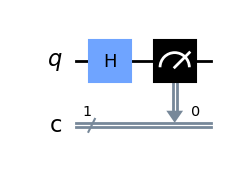

In [4]:
# visualisation of the circuit

circuit.draw('mpl')

In [5]:
# Qasm Simulator

backend = Aer.get_backend('qasm_simulator')
qobj = assemble(circuit)
result_sim = backend.run(qobj, shots=1).result()
counts = result_sim.get_counts(circuit)
print(counts)

{'1': 1}


ibmqfactory.load_account:WARNING:2022-12-18 23:36:57,414: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_belem
Job Status: job has successfully run


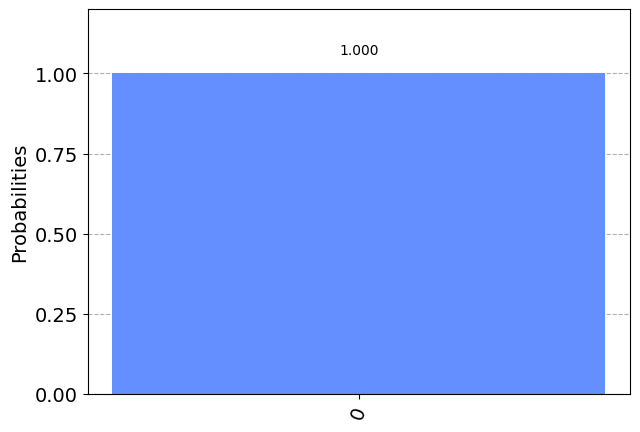

In [7]:
# Real Quantum Computer

shots = 1

IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2
and not x.configuration().simulator
and x.status().operational==True))
print("least busy backend: ", backend)

job = execute(circuit, backend=backend, shots=shots)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

result = job.result()
plot_histogram(result.get_counts(circuit))